In [27]:
import os
import cv2
import json
import numpy as np

import matplotlib.pyplot as plt

In [21]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
BAGLS_PATH = '/content/drive/My Drive/Mini_BAGLS_dataset'
files = os.listdir(BAGLS_PATH)
print(type(files))

print(files)

<class 'list'>
['17_seg.png', '16_seg.png', '17.meta', '15_seg.png', '16.png', '17.png', '16.meta', '15.meta', '15.png', '14_seg.png', '14.png', '12.png', '12_seg.png', '11_seg.png', '13_seg.png', '14.meta', '12.meta', '13.meta', '13.png', '0.png', '11.png', '0_seg.png', '10.png', '1.png', '1.meta', '11.meta', '0.meta', '10.meta', '10_seg.png', '24_seg.png', '25.png', '26.png', '25.meta', '24.meta', '24.png', '23_seg.png', '23.png', '21_seg.png', '22_seg.png', '20_seg.png', '21.png', '23.meta', '21.meta', '22.meta', '22.png', '20.png', '1_seg.png', '2.png', '19_seg.png', '20.meta', '2.meta', '19.png', '19.meta', '18_seg.png', '18.png', '18.meta', '35_seg.png', '35.meta', '34_seg.png', '35.png', '33_seg.png', '34.png', '33.meta', '34.meta', '33.png', '32_seg.png', '32.png', '30.png', '31.png', '30_seg.png', '31_seg.png', '32.meta', '31.meta', '30.meta', '3.png', '28_seg.png', '29.png', '2_seg.png', '3.meta', '29.meta', '29_seg.png', '27_seg.png', '28.png', '28.meta', '27.png', '26_seg.p

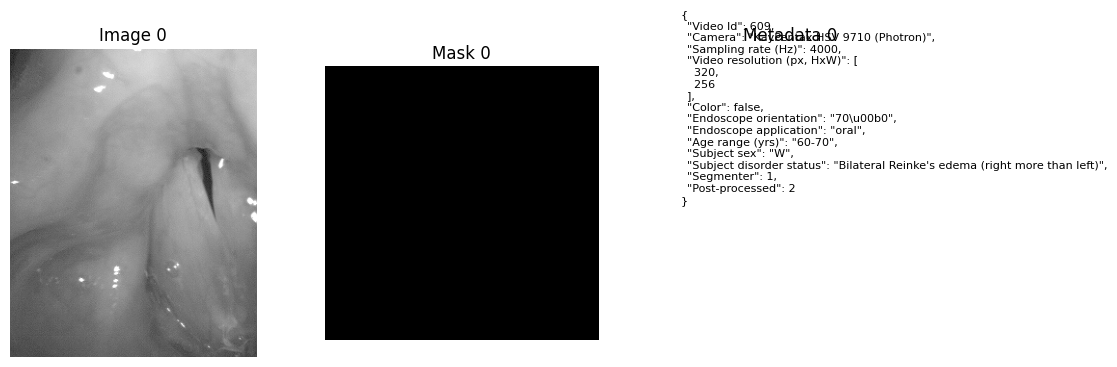

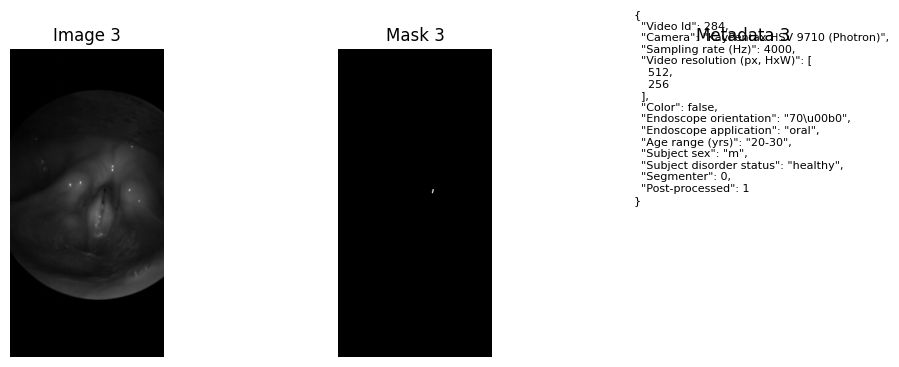

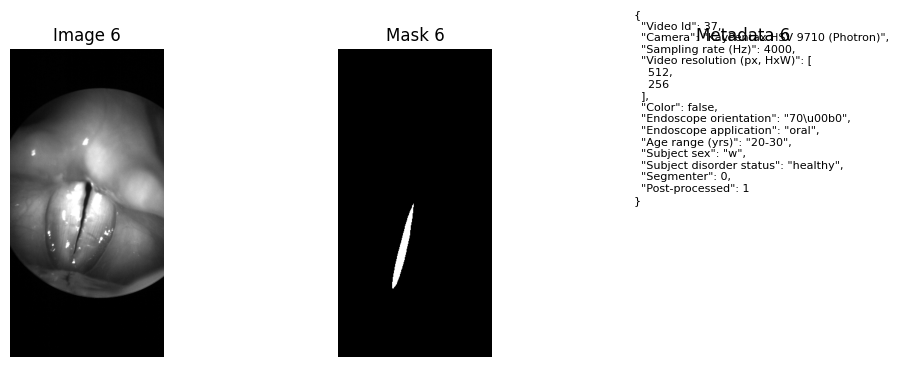

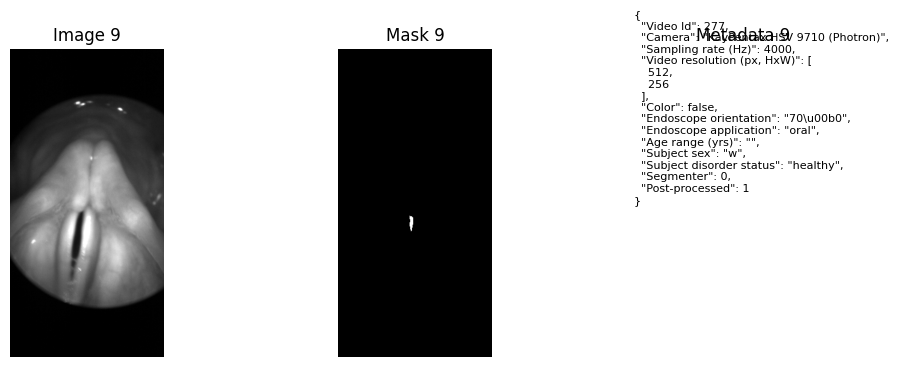

In [33]:
 Filter images and their corresponding masks
image_files = [f for f in files if f.endswith('.png') and '_seg' not in f]
mask_files = [f for f in files if f.endswith('_seg.png')]

# Select four arbitrary indices
indices = [0, 3, 6, 9]

# Display the images and masks
for i, idx in enumerate(indices):
    # Load image
    image_path = os.path.join(BAGLS_PATH, image_files[idx])
    image = cv2.imread(image_path)

    # Load segmentation mask
    mask_path = os.path.join(BAGLS_PATH, mask_files[idx])
    mask = cv2.imread(mask_path)

    # Load metadata (assuming metadata is stored in a JSON file with the same name)
    metadata_path = os.path.join(BAGLS_PATH, image_files[idx].replace('.png', '.meta'))
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)

    # Display the images, masks, and metadata
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image {}'.format(idx))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title('Mask {}'.format(idx))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.text(0.1, 0.5, json.dumps(metadata, indent=2), fontsize=8, color='black')
    plt.title('Metadata {}'.format(idx))
    plt.axis('off')

    plt.show()


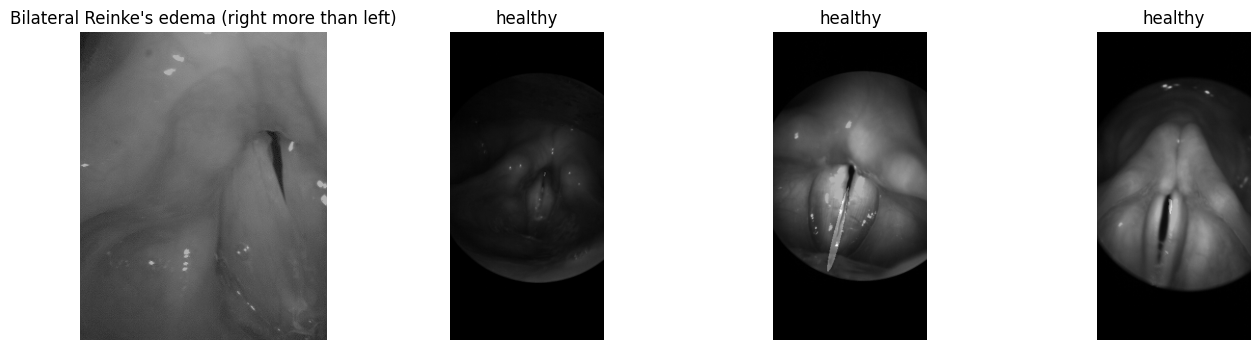

In [35]:
import os
import cv2
import matplotlib.pyplot as plt
import json

BAGLS_PATH = '/content/drive/My Drive/Mini_BAGLS_dataset'

# Filter images and their corresponding masks
image_files = [f for f in files if f.endswith('.png') and '_seg' not in f]
mask_files = [f for f in files if f.endswith('_seg.png')]

# Select four arbitrary indices
indices = [0, 3, 6, 9]

# Display the images with segmentation masks overlaid
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, idx in enumerate(indices):
    # Load image
    image_path = os.path.join(BAGLS_PATH, image_files[idx])
    image = cv2.imread(image_path)

    # Load segmentation mask
    mask_path = os.path.join(BAGLS_PATH, mask_files[idx])
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask to match the dimensions of the image
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Load metadata (assuming metadata is stored in a JSON file with the same name)
    metadata_path = os.path.join(BAGLS_PATH, image_files[idx].replace('.png', '.meta'))
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)

    # Overlay the segmentation mask on the image
    masked_image = cv2.addWeighted(image, 0.7, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), 0.3, 0)

    # Display the images with titles
    axs[i].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    axs[i].set_title(metadata.get('Subject disorder status', 'Unknown'))
    axs[i].axis('off')

plt.show()


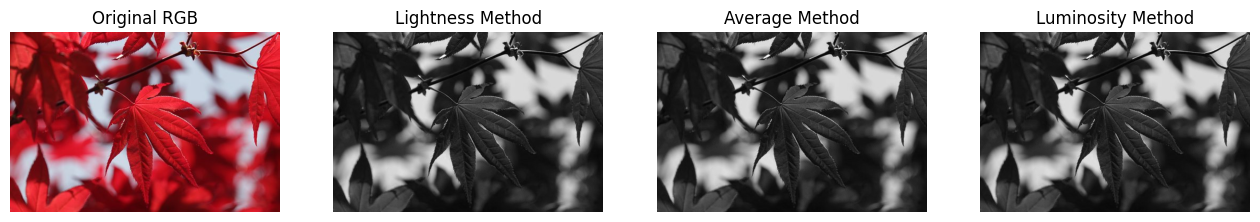

In [36]:
import cv2
import matplotlib.pyplot as plt

# Load the RGB image
image_path = '/content/drive/My Drive/leaves.jpg'
rgb_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert RGB to Grayscale using Lightness Method
gray_lightness = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

# Convert RGB to Grayscale using Average Method
gray_average = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

# Convert RGB to Grayscale using Luminosity Method
gray_luminosity = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

# Display the images using subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Plot the original RGB image
axs[0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original RGB')
axs[0].axis('off')

# Plot the grayscale images using different methods
axs[1].imshow(gray_lightness, cmap='gray')
axs[1].set_title('Lightness Method')
axs[1].axis('off')

axs[2].imshow(gray_average, cmap='gray')
axs[2].set_title('Average Method')
axs[2].axis('off')

axs[3].imshow(gray_luminosity, cmap='gray')
axs[3].set_title('Luminosity Method')
axs[3].axis('off')

plt.show()
